##### Matin Moezi - 9512058 - DataMining Project - Spring 2020

# Problem 2

## Part (a): Features Correlation with Heatmap & Pairplot

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
EcomCust = pd.read_csv('data/Ecommerce Customers.csv')
EcomCust.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [21]:
EcomCust.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [22]:
EcomCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


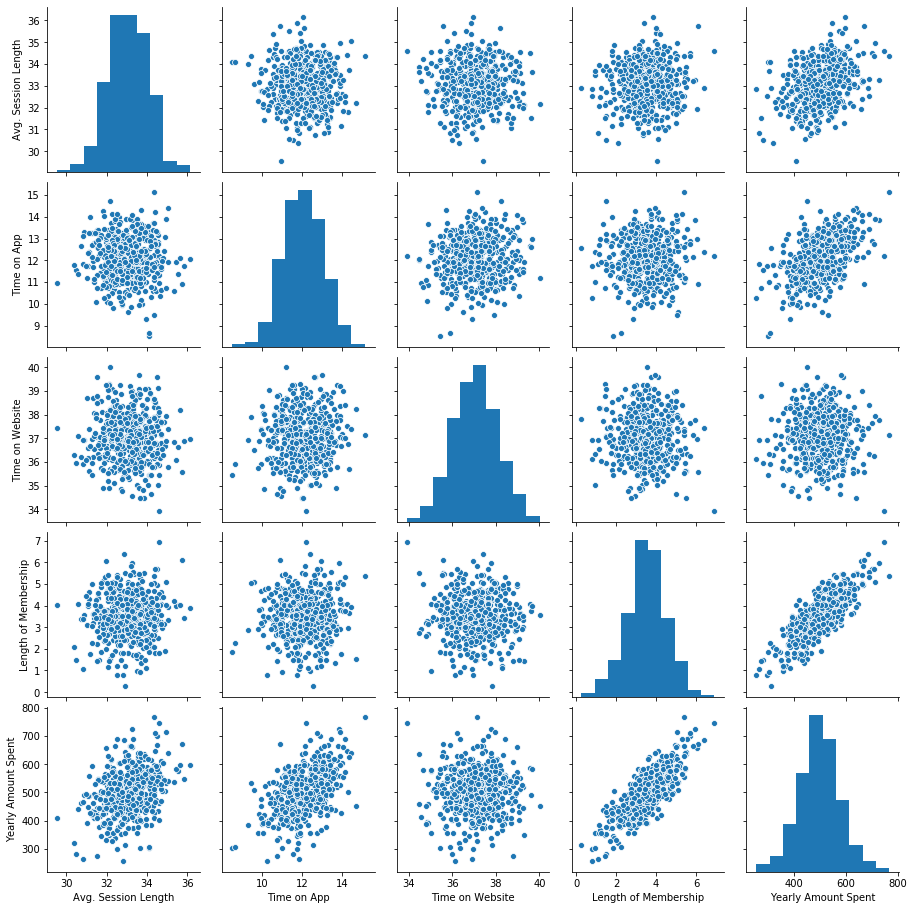

In [23]:
sns.pairplot(EcomCust)

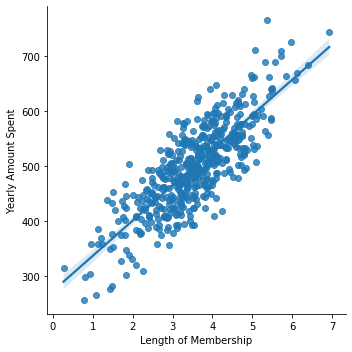

In [24]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=EcomCust)

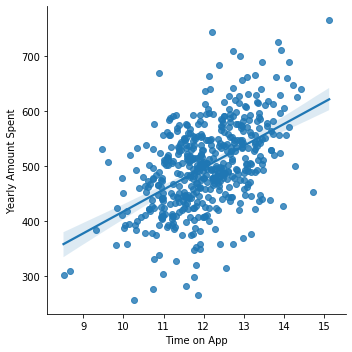

In [25]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=EcomCust)

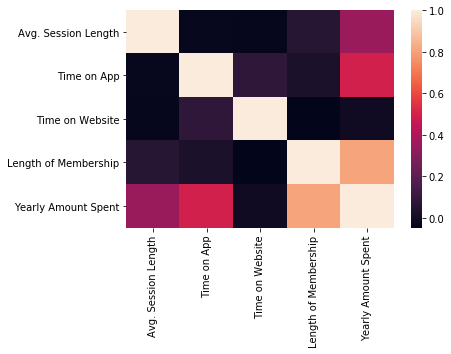

In [26]:
EcomCust.corr()
sns.heatmap(EcomCust.corr())

## Part (b): Linear Regression

In [27]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse, mse
from sklearn.model_selection import train_test_split, cross_val_score

In [28]:
X = EcomCust.iloc[:,3:7]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [29]:
y = EcomCust['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     4641.
Date:                 Sat, 13 Jun 2020   Prob (F-statistic):          1.88e-298
Time:                         23:54:20   Log-Likelihood:                -1314.1
No. Observations:                  350   AIC:                             2638.
Df Residuals:                      345   BIC:                             2658.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1047.9328     28.509    -36.758      0.000   -1104.007    -991.859
Avg. Session Length     25.9815      0.557     46.657      0.000      24.886      27.077
Time on App             38.5902      0.590     65.411      0.000      37.430      39.751
Time on Website          0.1904      0.576      0.330      0.741      -0.943       1.324
Length of Membership    61.2791      0.568    107.923      0.000      60.162      62.396
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.505
Skew:                          -0.092   Prob(JB):                        0.777
Kurtosis:                       2.977   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
coeff = pd.DataFrame(data=lm.params, columns=['Coefficient'])
coeff

,Coefficient
const,-1047.932782
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [32]:
train_predict = lm.predict(X_train_const)
print('Train MSE: ', mse(train_predict, y_train))
print('Train RMSE: ', rmse(train_predict, y_train))

Train MSE:  106.85137432285714
Train RMSE:  10.336893843068001


## Part (c): K-fold Cross Validation

In [33]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
neg_scores = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
root_scores = np.sqrt(-neg_scores)
print('Test Error Estimation')
print('Mean Scores', root_scores.mean())
print('Std. Scores', root_scores.std())


Test Error Estimation
Mean Scores 10.48528954444864
Std. Scores 0.747354154742341


## Part (d): Test Set Prediction

In [34]:
test_predict = lm.predict(X_test_const)
print('Test MSE: ', mse(test_predict, y_test))
print('Test RMSE: ', rmse(test_predict, y_test))

Test MSE:  79.8130516509753
Test RMSE:  8.933815066978681
